<a href="https://colab.research.google.com/github/Aastha2105/Machine-learning-on-US-sectoral-market-performance/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin
!pip install kneed
import pandas as pd
import yahoo_fin.stock_info as si
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from kneed import KneeLocator


sp500_list = si.tickers_sp500()
sp500_historical = {}


#Extracting stock info S&P  from 01-01-2020 to 31-12-2022
for ticker in sp500_list:
  sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2022", interval="1d")
  #sp500_historical = sp500_historical.rename(columns={"date":"Date"})
  #sp500_historical["date"] = pd.to_datetime(sp500_historical.date)
  #sp500_historical[date] = pd.to_datetime(sp500_historical[date], infer_datetime_format=True)
sp500_historical
'''#Concatenating the data extracted and cleaning it
concatenated_data = pd.concat(sp500_historical)
concatenated_data.reset_index(drop=True, inplace=True)
pd.set_option('precision',3)
concatenated_data = concatenated_data.pivot(index='date', columns='ticker', values = 'adjclose')

#Preparing the data for clustering by cleaning the data shape and calculating returns
missing_percentage = concatenated_data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.001].index))
concatenated_data.drop(labels=dropped_list, axis=1, inplace=True)
concatenated_data = concatenated_data.fillna(method='ffill')

#Calculating the returns and creating the data frame
stock_returns = concatenated_data.pct_change().mean()*252 #multiplied by the number of trading days
stock_returns = pd.DataFrame(stock_returns)
stock_returns.columns = ['returns']

#Calculating the volatility
std= concatenated_data.pct_change().std()
sqrt= np.sqrt(252)
stock_returns['volatility'] = std*sqrt
concatenated_data = stock_returns

#Preparing the scaler
scaler = StandardScaler().fit(concatenated_data)

#Fitting the scaler
data_scaled = pd.DataFrame(scaler.fit_transform(concatenated_data),columns = concatenated_data.columns, index = concatenated_data.index)
final_data = data_scaled


### Calculating the distortions for each value of k
### Distortion is the sum of squared distances from each point to its assigned center.
number_clusters= range(1,10)
distortions = []

#Fit the method
for x in range(1,20):
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(final_data)
    distortions.append(kmeans.inertia_)

#Plot the results
number_clusters= range(1,20)
plt.plot(number_clusters, distortions, 'bx-')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Methodology')

#To find the optimal number of clusters
knee_locator = KneeLocator(number_clusters, distortions, curve="convex", direction="decreasing")
knee_locator.elbow

'''


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 5.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=7ba124e4bb81e9a2ebd92b5984caf77b4f85817e016f70694593d784887410f6
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=a2280a60773cc93280f8089162d8048779b3e5296e68f3b25be830439122e225
  Stored in directory: /root/.cache/pip/wheels/d6/9c/58/ee

/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


'#Concatenating the data extracted and cleaning it   \nconcatenated_data = pd.concat(sp500_historical)\nconcatenated_data.reset_index(drop=True, inplace=True)\npd.set_option(\'precision\',3)\nconcatenated_data = concatenated_data.pivot(index=\'date\', columns=\'ticker\', values = \'adjclose\')\n\n#Preparing the data for clustering by cleaning the data shape and calculating returns\nmissing_percentage = concatenated_data.isnull().mean().sort_values(ascending=False)\ndropped_list = sorted(list(missing_percentage[missing_percentage > 0.001].index))\nconcatenated_data.drop(labels=dropped_list, axis=1, inplace=True)\nconcatenated_data = concatenated_data.fillna(method=\'ffill\')\n\n#Calculating the returns and creating the data frame\nstock_returns = concatenated_data.pct_change().mean()*252 #multiplied by the number of trading days\nstock_returns = pd.DataFrame(stock_returns)\nstock_returns.columns = [\'returns\']\n\n#Calculating the volatility\nstd= concatenated_data.pct_change().std()\ns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto'

5

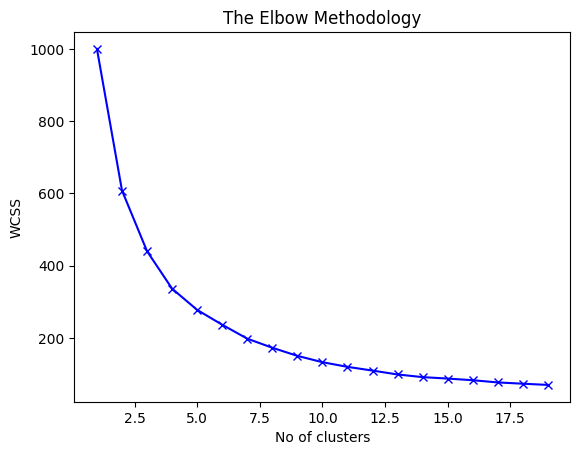

In [ ]:
!pip install yahoo_fin
!pip install kneed
import yahoo_fin.stock_info as si
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from kneed import KneeLocator

sp500 = si.tickers_sp500()
sp500_old = {}
for ticker in sp500:
    sp500_old[ticker] = si.get_data(ticker, start_date="01/02/2020",  end_date="12/30/2022", index_as_date = False, interval="1d")

#Concatenating the data
concat_data = pd.concat(sp500_old)
concat_data.reset_index(drop=True, inplace=True)
concat_data = concat_data.pivot(index='date', columns='ticker', values = 'adjclose')

concat_data.to_csv('SP500_stocks_data')

#Data Cleaning

percent_missed = concat_data.isnull().mean().sort_values(ascending=False)
percent_missed.head(10)
list_dropped = sorted(list(percent_missed[percent_missed > 0.2].index))
concat_data.drop(labels=list_dropped, axis=1, inplace=True)

concat_data = concat_data.fillna(method='ffill')


#Calculating the returns and creating the data frame
stock_returns = concat_data.pct_change().mean()*252 #multiplied by the number of trading days
stock_returns = pd.DataFrame(stock_returns)
stock_returns.columns = ['Returns']


#Calculating the volatility
std= concat_data.pct_change().std()
sqrt= np.sqrt(252)
stock_returns['Volatility'] = std*sqrt
concat_data = stock_returns

#Preparing the scaler
scaler = StandardScaler().fit(concat_data)

#Fitting the scaler
data_scaled = pd.DataFrame(scaler.fit_transform(concat_data),columns = concat_data.columns, index = concat_data.index)
final_data = data_scaled

### Calculating the distortions for each value of k
### Distortion is the sum of squared distances from each point to its assigned center.
number_clusters= range(1,20)
distortions = []

#Fit the method
for x in number_clusters:
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(final_data)
    distortions.append(kmeans.inertia_)

#Plot the results

plt.plot(number_clusters, distortions, 'bx-')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Methodology')
kl = KneeLocator(number_clusters, distortions, curve="convex", direction="decreasing")
kl.elbow


In [ ]:
final_data

,Returns,Volatility
ticker,,
A,0.570502,-0.762126
AAL,-1.185271,2.866669
AAP,-0.670304,-0.258877
AAPL,0.655994,-0.308140
ABBV,0.818747,-1.203101
...,...,...
YUM,-0.107062,-0.832138
ZBH,-0.874952,-0.330574
ZBRA,-0.491836,0.176602


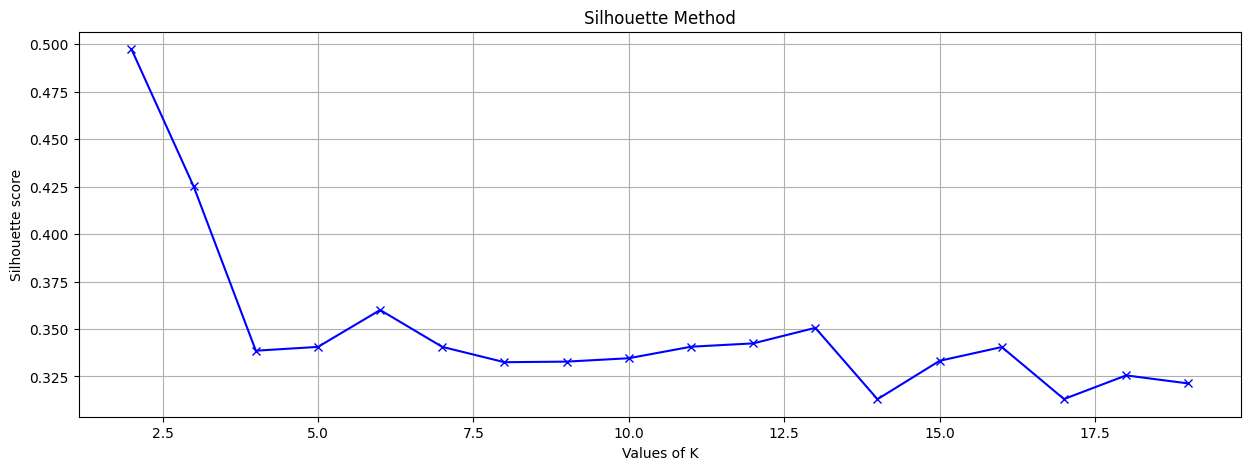

Suggested number of clusters:  4


'sp500_historical = {}\nfor ticker in sp500:\n    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2020",  end_date="12/31/2022", index_as_date = False, interval="1d")\nsp500_historical'

In [ ]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,20)
silhouettes = []

#Fit the method
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(final_data)
    silhouettes.append(silhouette_score(final_data, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

'''sp500_historical = {}
for ticker in sp500:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2020",  end_date="12/31/2022", index_as_date = False, interval="1d")
sp500_historical'''

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


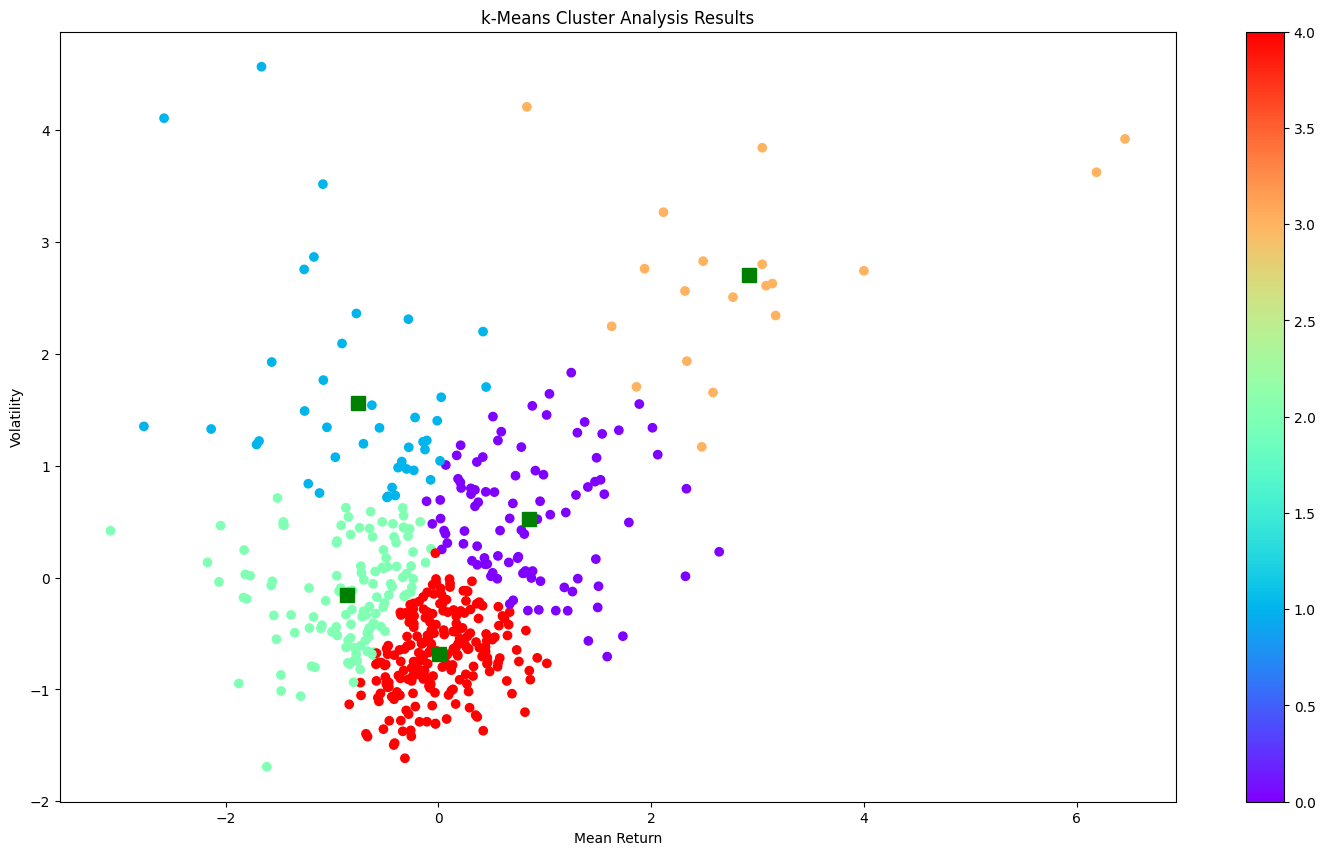

In [ ]:
c = 5
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(final_data)
prediction = k_means.predict(final_data)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(final_data.iloc[:,0],final_data.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = final_data.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()


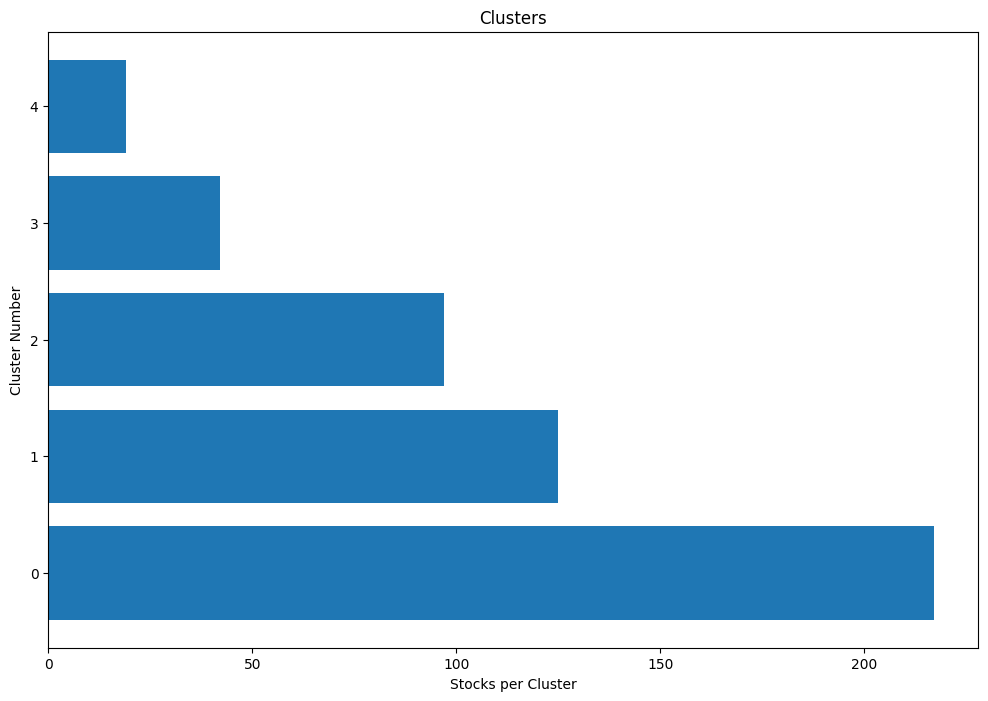

In [ ]:
series_cluster = pd.Series(index=final_data.index, data=k_means.labels_.flatten())
clustered_all = pd.Series(index=final_data.index, data=k_means.labels_.flatten())
series_cluster = series_cluster[series_cluster != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(series_cluster.value_counts())),series_cluster.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()


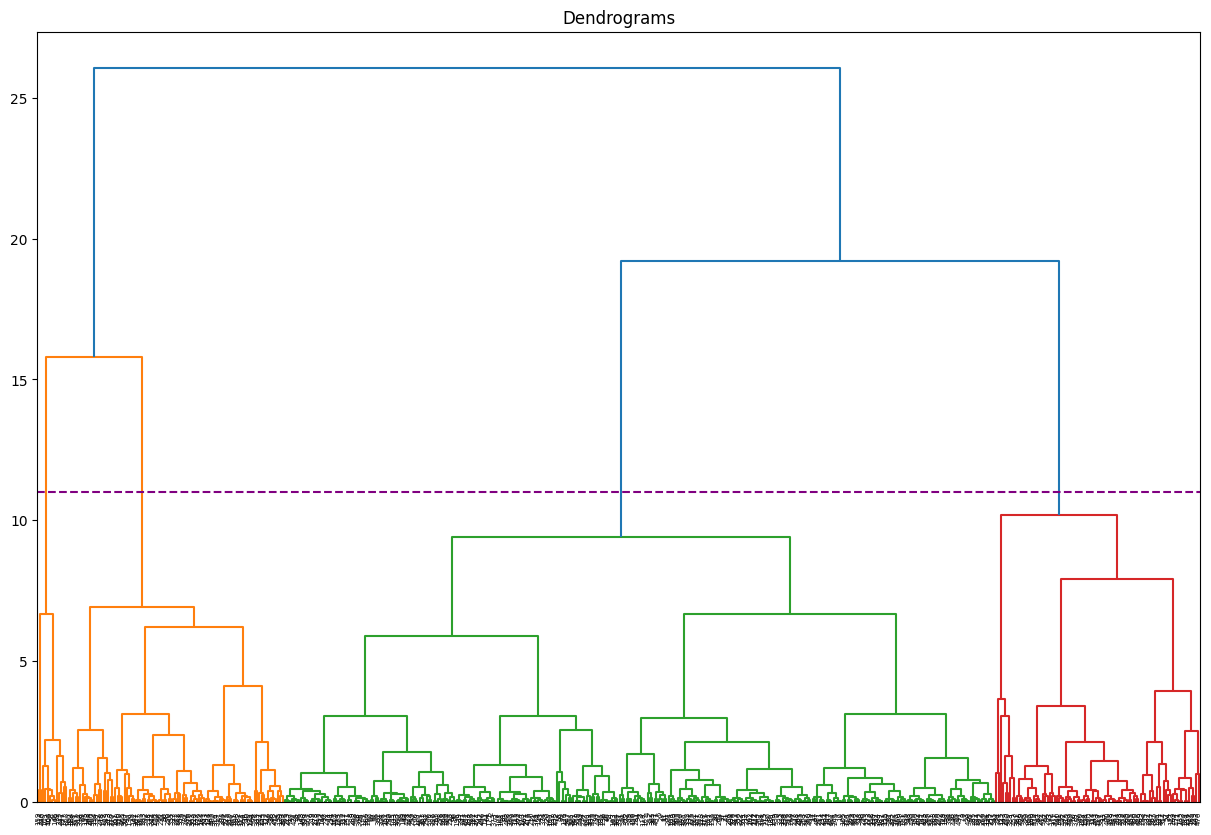

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(final_data, method='ward'))
plt.axhline(y=11, color='purple', linestyle='--')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


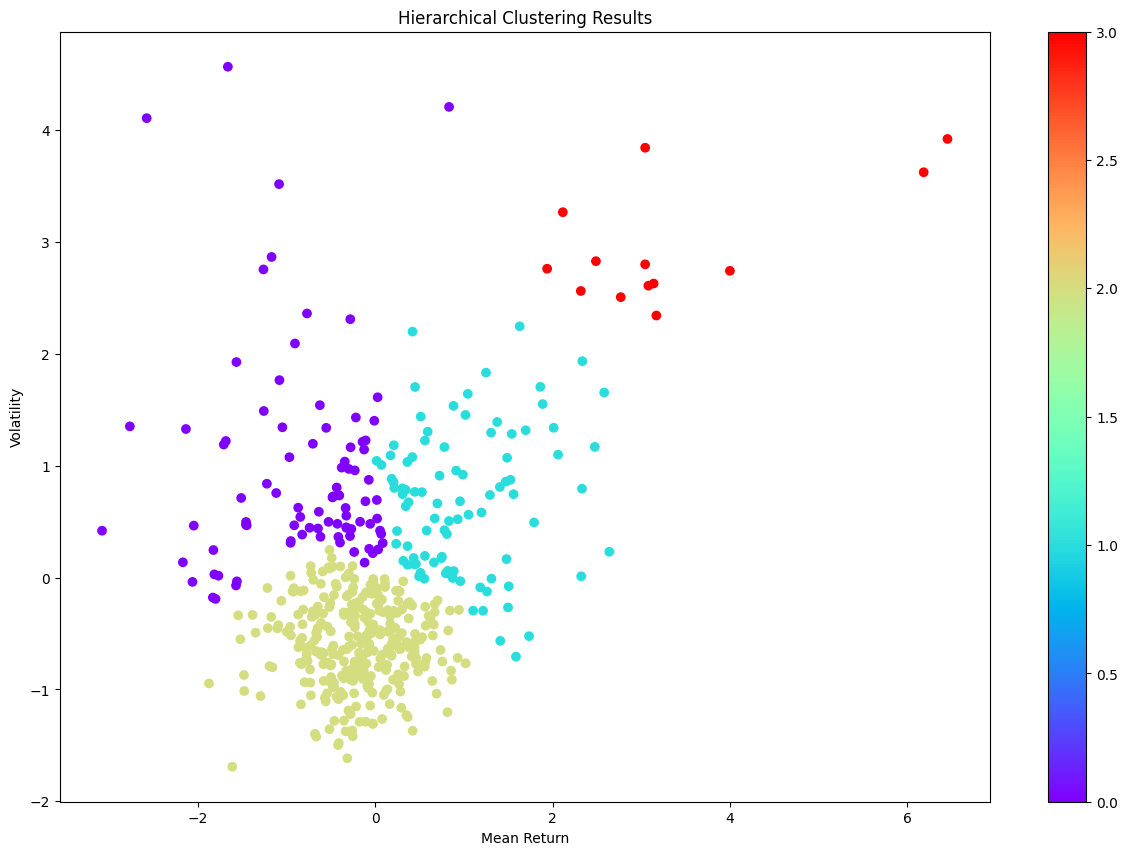

In [ ]:
clusters = 4
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(final_data)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)


scatter = ax.scatter(final_data.iloc[:,0], final_data.iloc[:,1], c=labels, cmap='rainbow')

ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

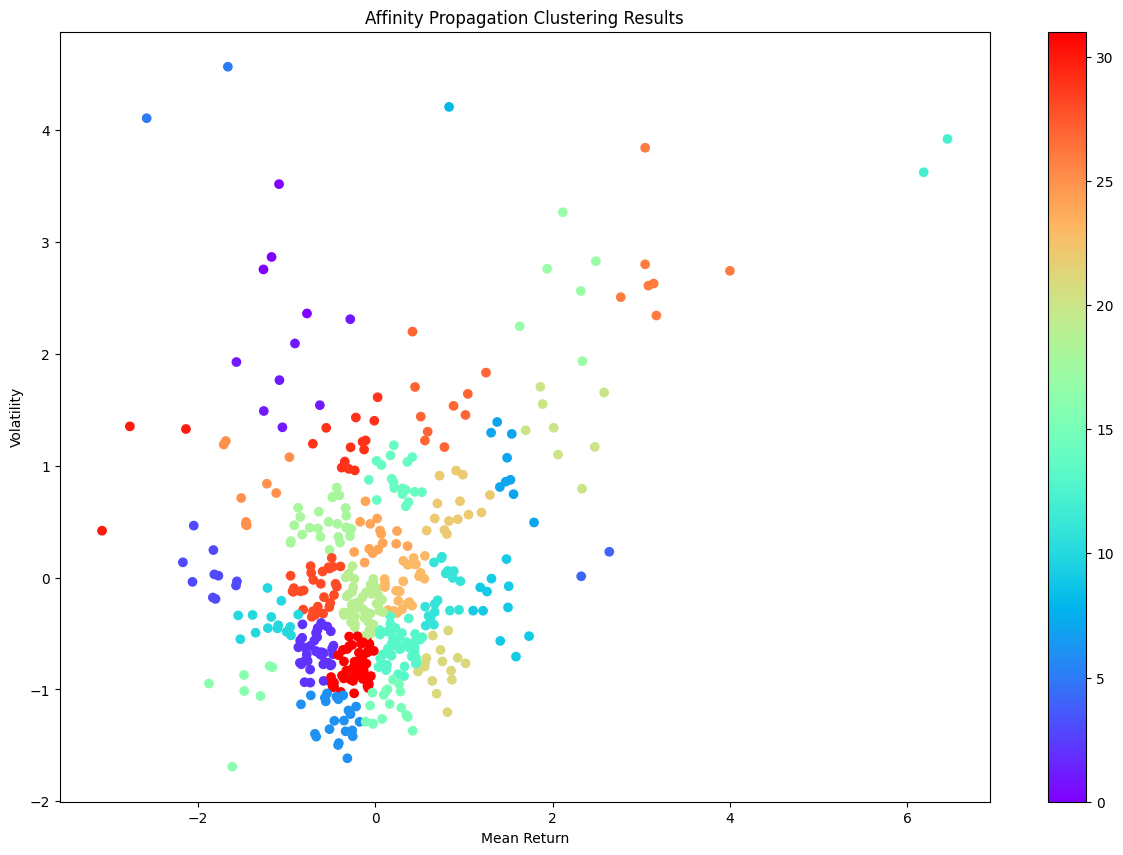

In [ ]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(final_data)
labels1 = ap.predict(final_data)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(final_data.iloc[:,0], final_data.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 32


<Figure size 640x480 with 0 Axes>

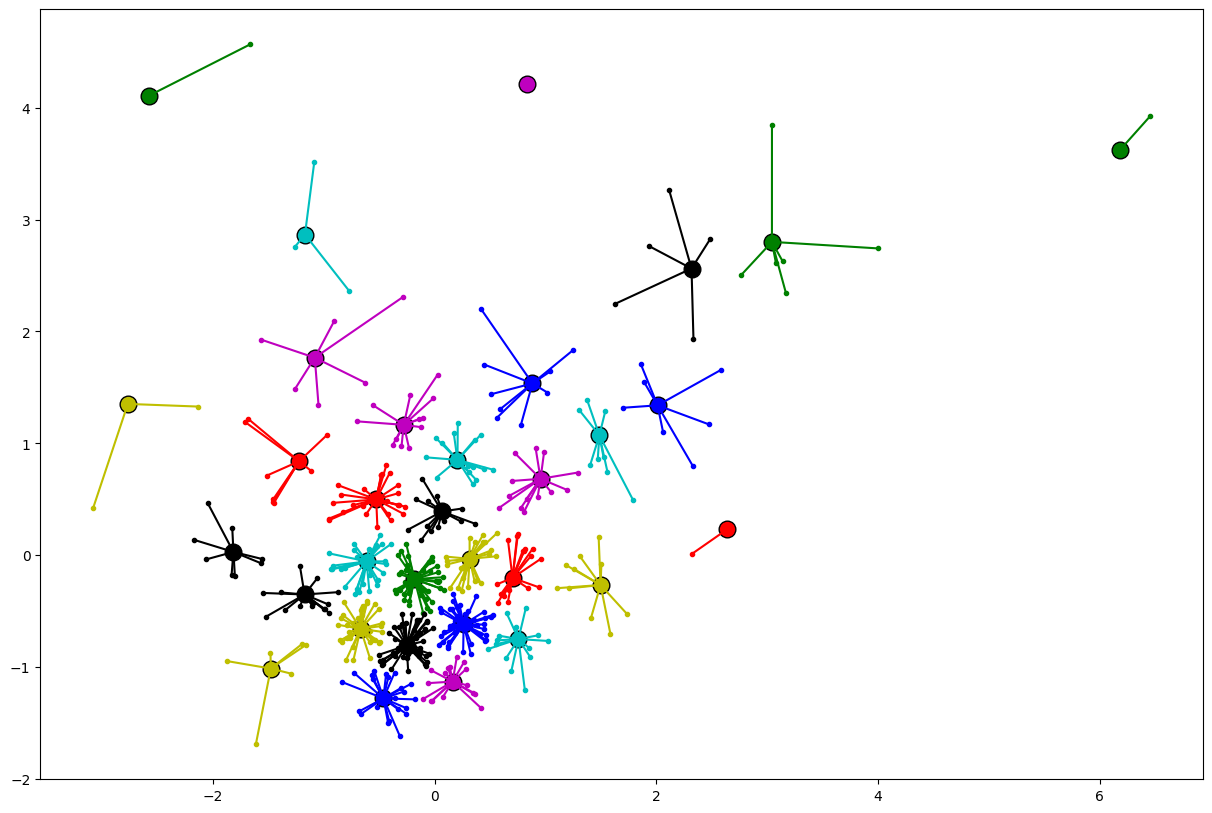

In [ ]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(final_data)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [ ]:
print("k-Means Clustering", metrics.silhouette_score(final_data, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(final_data, hc.fit_predict(final_data), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(final_data, ap.labels_, metric='euclidean'))



k-Means Clustering 0.3405903921530677
Hierarchical Clustering 0.4153804553882496
Affinity Propagation Clustering 0.3521573013578393


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#following heirarchical
optimal_n_clusters = 4
agglom = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels = agglom.fit_predict(final_data)
final_data['Cluster'] = cluster_labels
final_data

,Returns,Volatility,Cluster
ticker,,,
A,0.560512,-0.762104,2
AAL,-1.170630,2.866620,0
AAP,-0.648863,-0.259102,2
AAPL,0.669785,-0.308445,2
ABBV,0.813391,-1.203223,2
...,...,...,...
YUM,-0.131082,-0.831404,2
ZBH,-0.870242,-0.330859,2
ZBRA,-0.491744,0.176404,2


In [ ]:
!pip install yahoo_fin
!pip install kneed
import yahoo_fin.stock_info as si
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from kneed import KneeLocator

sp500 = si.tickers_sp500()
sp500_old = {}
for ticker in sp500:
    sp500_old[ticker] = si.get_data(ticker, start_date="01/02/2020",  end_date="12/30/2022", index_as_date = False, interval="1d")

#Concatenating the data
concat_data = pd.concat(sp500_old)
concat_data.reset_index(drop=True, inplace=True)
concat_data = concat_data.pivot(index='date', columns='ticker', values = 'adjclose')
concat_data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 3.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=9c20102cb443668c8bd972c0c69acddeed1ca28051ae1ac4074f3edfb018e715
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=d744d807d68e21e29689afc3bdbf1693bedbeb07b92fed1533db9228ab469e68
  Stored in directory: /root/.cache/pip/wheels/d6/9c/58/ee

/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()
/usr/local/lib/python3.9/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,84.108345,28.982893,150.342819,73.449402,77.198746,81.061333,82.532562,43.400002,200.733658,334.429993,...,142.405029,57.058815,59.038689,54.990807,76.823212,96.286102,141.331970,259.140015,47.579472,131.370209
2020-01-03,82.757942,27.548195,150.352234,72.735306,76.465981,80.041893,81.526443,43.349998,200.399292,331.809998,...,140.292755,57.333225,58.564049,54.382263,77.275391,95.984520,140.962509,256.049988,46.908058,131.389832
2020-01-06,83.002563,27.219410,147.881302,73.314888,77.069443,81.213783,81.953568,43.520000,199.090683,333.709991,...,140.015091,57.250896,59.013714,54.681705,76.775116,95.927971,140.147858,258.010010,46.336452,130.381058
2020-01-07,83.257004,27.119778,146.127090,72.970093,76.629776,80.632599,81.497955,43.160000,194.792358,333.390015,...,140.679504,57.131992,58.530735,54.971485,76.486473,96.097626,140.024689,256.470001,46.055187,130.821762
2020-01-08,84.079002,27.737495,144.448334,74.143921,77.172882,81.413864,81.830154,42.730000,195.174423,337.869995,...,141.562103,57.077106,57.648083,55.551048,76.746231,96.267235,141.701401,247.639999,46.508842,130.537750


In [ ]:
concat_data.shape

(755, 503)